In [1]:
#IMPORTING THE LIBRARY
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [2]:
# Reading the dataset 
df=pd.read_csv("netflix_titles.csv")

**Introduction to dataset**

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [4]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

**1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.**

In [7]:
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
df.drop_duplicates(inplace = True)
df.shape

(8807, 12)

 **2) Is there any Null Value present in any column ? Show with Heat-map.**

In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

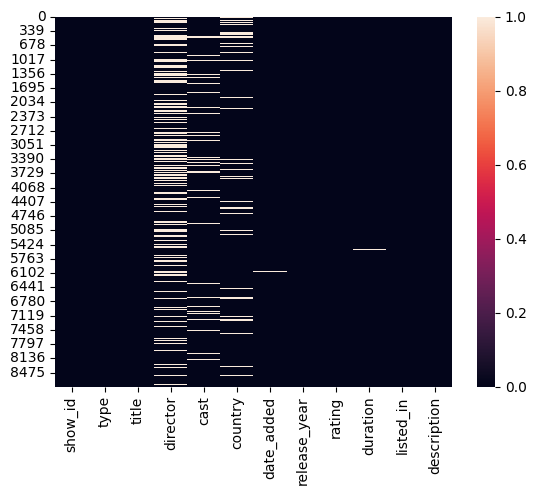

In [10]:
sns.heatmap(df.isnull())

## EDA

**Q.1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?**

In [11]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [12]:
df[df['title']== 'House of Cards']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


**2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.**

In [13]:
df.release_year.value_counts()

release_year
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Sumit\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='release_year', ylabel='count'>

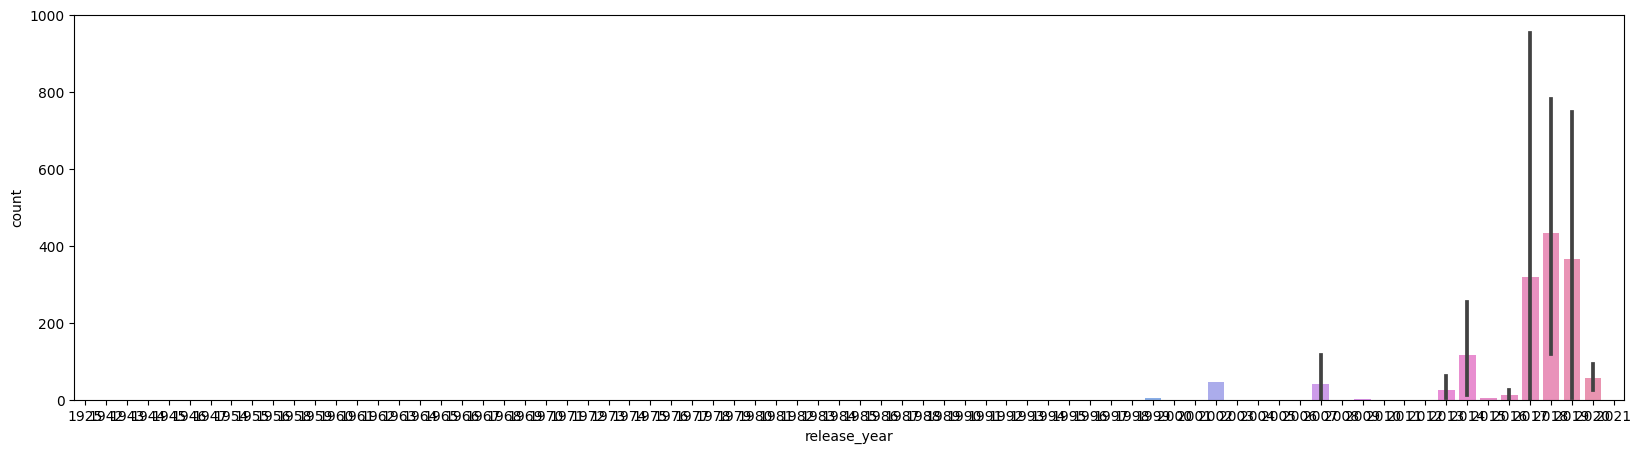

In [14]:
plt.figure(figsize = (20, 5))
sns.barplot(x = df.release_year , y = df.release_year.value_counts() )

**3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.**

In [15]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


<Axes: xlabel='type'>

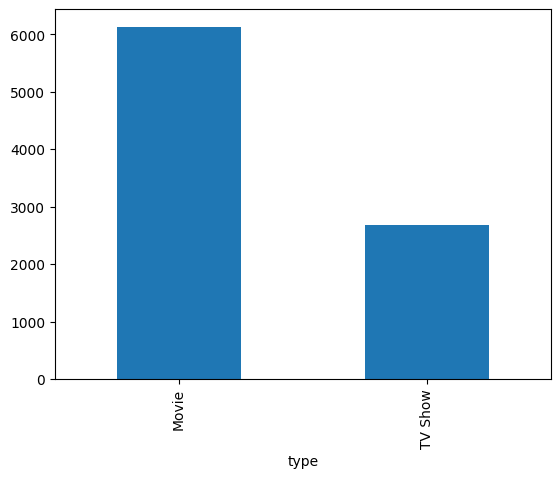

In [16]:
df['type'].value_counts().plot(kind="bar")

**Q. 4) Show all the Movies that were released in year 2000**

In [17]:
df[(df['type']=='Movie') & (df['release_year']== 2000)]['title']

180                    The Nutty Professor II: The Klumps
350                                         Space Cowboys
359                          The Original Kings of Comedy
566                                      Charlie's Angels
593                                              Snow Day
779                                     Battlefield Earth
952                                  The Whole Nine Yards
3472                          Rugrats in Paris: The Movie
4545               Monty Python: Before the Flying Circus
4723                                                 Fiza
4956                          Phir Bhi Dil Hai Hindustani
5953                               Joseph: King of Dreams
6006                                              28 Days
6147                                      American Psycho
6154    An American Tail: The Treasures of Manhattan I...
6311                                         Billy Elliot
6437                                         Center Stage
6440          

**Q. 5) Show only the Titles of all TV Shows that were released in India only.**

In [18]:
df[(df['type']=='TV Show') & (df['country']== 'India')]['title'].reset_index()

,index,title
0,4,Kota Factory
1,39,Chhota Bheem
2,50,Dharmakshetra
3,66,Raja Rasoi Aur Anya Kahaniyan
4,69,Stories by Rabindranath Tagore
...,...,...
74,8173,Thackeray
75,8235,The Calling
76,8321,The Golden Years with Javed Akhtar
77,8349,The House That Made Me


**Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?**

In [19]:
df['director'].value_counts()

director
Rajiv Chilaka                     19
Raúl Campos, Jan Suter            18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Mozez Singh                        1
Name: count, Length: 4528, dtype: int64

**Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".**

In [20]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom**

In [21]:
df[(df['type']=='Movie') & (df['listed_in'].str.contains('Comedies')) | (df['country']== 'United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
13,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,"Klara Castanho, Lucca Picon, Júlia Gomes, Marc...",NaN,"September 22, 2021",2021,TV-PG,91 min,"Children & Family Movies, Comedies",When the clever but socially-awkward Tetê join...
22,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,"Kamal Hassan, Meena, Gemini Ganesan, Heera Raj...",NaN,"September 21, 2021",1996,TV-PG,161 min,"Comedies, International Movies",Newly divorced and denied visitation rights wi...
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8798,s8799,Movie,Zed Plus,Chandra Prakash Dwivedi,"Adil Hussain, Mona Singh, K.K. Raina, Sanjay M...",India,"December 31, 2019",2014,TV-MA,131 min,"Comedies, Dramas, International Movies",A philandering small-town mechanic's political...
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [22]:
df[(df.type =='Movie') &(df.listed_in =='Comedies')|(df.country == 'United Kingdom')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
32,s33,TV Show,Sex Education,NaN,"Asa Butterfield, Gillian Anderson, Ncuti Gatwa...",United Kingdom,"September 17, 2021",2020,TV-MA,3 Seasons,"British TV Shows, International TV Shows, TV C...",Insecure Otis has all the answers when it come...
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ..."
72,s73,TV Show,Jack Whitehall: Travels with My Father,NaN,"Jack Whitehall, Michael Whitehall",United Kingdom,"September 14, 2021",2021,TV-MA,5 Seasons,"British TV Shows, Docuseries, International TV...",Jovial comic Jack Whitehall invites his stuffy...
...,...,...,...,...,...,...,...,...,...,...,...,...
8740,s8741,TV Show,Wild Alaska,NaN,Dougray Scott,United Kingdom,"March 31, 2017",2015,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The natural bounty of Alaska sustains its dive...
8741,s8742,TV Show,Wild Arabia,NaN,Alexander Siddig,United Kingdom,"March 31, 2017",2013,TV-PG,1 Season,"British TV Shows, Docuseries, Science & Nature TV",The widely varied geology and dramatic landsca...
8744,s8745,Movie,Williams,Morgan Matthews,NaN,United Kingdom,"November 4, 2017",2017,TV-MA,105 min,"Documentaries, International Movies, Sports Mo...",This inspiring documentary charts the birth of...
8758,s8759,TV Show,World's Busiest Cities,NaN,"Anita Rani, Ade Adepitan, Dan Snow",United Kingdom,"February 1, 2019",2017,TV-PG,1 Season,"British TV Shows, Docuseries","From Moscow to Mexico City, three BBC journali..."


**Q. 8) In how many movies/shows, Tom Cruise was cast ?**

In [23]:
ds = df.dropna() 
ds[ds['cast'].str.contains('Tom Cruise')]['title'].reset_index()

,index,title
0,341,Magnolia
1,1254,Rain Man


**Q. 9) What are the different Ratings defined by Netflix ?**

In [24]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

**9.1) How many Movies got the 'TV-14' rating, in Canada ?**

In [25]:
df[(df['type'] == 'Movie') & (df['rating']=='TV-14') & (df['country'] == 'Canada')].count()

show_id         13
type            13
title           13
director        13
cast            10
country         13
date_added      13
release_year    13
rating          13
duration        13
listed_in       13
description     13
dtype: int64

**9.2) How many TV Shows got the 'TV-MA' rating, after year 2018 ?**

In [26]:
df[(df['type']=='TV Show') & (df['rating']=='TV-MA') & (df['release_year'] > 2018)].count()

show_id         623
type            623
title           623
director         84
cast            521
country         534
date_added      623
release_year    623
rating          623
duration        623
listed_in       623
description     623
dtype: int64

**10) What is the maximum duration of a Movie/Show on Netflix ?**

In [27]:
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [28]:
# Convert the 'duration' column to a numerical value (assuming it's in minutes)
df['durations'] = pd.to_numeric(df['duration'].str.replace(' min', ''), errors='coerce') 

# Find the maximum duration
max_duration = df['durations'].max()

print(f"The maximum duration of a movie or show on Netflix is: {max_duration} minutes")


The maximum duration of a movie or show on Netflix is: 312.0 minutes


**11) Which individual country has the Highest No. of TV Shows ?**

In [29]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,durations
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN


In [30]:
df.groupby('type')['country'].value_counts().head(1)

type   country      
Movie  United States    2058
Name: count, dtype: int64

**Q. 12) How can we sort the dataset by Year ?**

In [31]:
df.sort_values(by='release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,durations
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,NaN
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52.0
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61.0
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,82.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,s863,TV Show,Special,NaN,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,TV-MA,2 Seasons,TV Comedies,A young gay man with cerebral palsy branches o...,NaN
861,s862,Movie,Little Singham Future mein Satakli,Prakash Satam,"Anamaya Verma, Ganesh Divekar, Jigna Bharadhwa...",NaN,"May 20, 2021",2021,TV-Y7,47 min,"Children & Family Movies, Comedies",Little Singham and his crew travel to the year...,47.0
857,s858,TV Show,The Neighbor,NaN,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,"May 21, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...,NaN
876,s877,TV Show,Alma Matters,NaN,NaN,India,"May 14, 2021",2021,TV-MA,1 Season,"Docuseries, International TV Shows",Alumni of India’s elite academic institutes sh...,NaN


**13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'**

In [32]:
df[(df.type == 'Movie') & (df.listed_in == 'Dramas') | (df.type == 'TV Show') & (df.listed_in == "Kids' TV")]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,durations
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,NaN
39,s40,TV Show,Chhota Bheem,NaN,"Vatsal Dubey, Julie Tejwani, Rupa Bhimani, Jig...",India,"September 16, 2021",2021,TV-Y7,3 Seasons,Kids' TV,"A brave, energetic little boy with superhuman ...",NaN
65,s66,TV Show,Numberblocks,NaN,"Beth Chalmers, David Holt, Marcel McCalla, Ter...",United Kingdom,"September 15, 2021",2021,TV-Y,6 Seasons,Kids' TV,"In a place called Numberland, math adds up to ...",NaN
89,s90,TV Show,Mighty Raju,NaN,"Julie Tejwani, Sabina Malik, Jigna Bhardwaj, R...",NaN,"September 9, 2021",2017,TV-Y7,4 Seasons,Kids' TV,"Born with superhuman abilities, young Raju wan...",NaN
100,s101,TV Show,Tobot Galaxy Detectives,NaN,"Austin Abell, Travis Turner, Cole Howard, Anna...",NaN,"September 7, 2021",2019,TV-Y7,2 Seasons,Kids' TV,An intergalactic device transforms toy cars in...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109.0
8696,s8697,Movie,War Horse,Steven Spielberg,"Emily Watson, David Thewlis, Peter Mullan, Nie...","United States, India","May 6, 2019",2011,PG-13,147 min,Dramas,"During World War I, the bond between a young E...",147.0
8783,s8784,TV Show,Yoko,NaN,"Eileen Stevens, Alyson Leigh Rosenfeld, Sarah ...",NaN,"June 23, 2018",2016,TV-Y,1 Season,Kids' TV,"Friends Mai, Oto and Vik's games at the park b...",NaN
8785,s8786,TV Show,YOM,NaN,"Sairaj, Devyani Dagaonkar, Ketan Singh, Mayur ...",NaN,"June 7, 2018",2016,TV-Y7,1 Season,Kids' TV,"With the mind of a human being, and the body o...",NaN


In [33]:
df[(df.type == 'Movie') & (df.listed_in.str.contains('Dramas')) | (df.type == 'TV Show') & (df.listed_in.str.contains("Kids' TV"))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,durations
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125.0
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104.0
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127.0
30,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...","Abhishek Banerjee, Rinku Rajguru, Delzad Hiwal...",NaN,"September 17, 2021",2021,TV-14,111 min,"Dramas, Independent Movies, International Movies","As big city life buzzes around them, lonely so...",111.0
34,s35,TV Show,Tayo and Little Wizards,NaN,"Dami Lee, Jason Lee, Bommie Catherine Han, Jen...",NaN,"September 17, 2021",2020,TV-Y7,1 Season,Kids' TV,Tayo speeds into an adventure when his friends...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8799,s8800,Movie,Zenda,Avadhoot Gupte,"Santosh Juvekar, Siddharth Chandekar, Sachit P...",India,"February 15, 2018",2009,TV-14,120 min,"Dramas, International Movies",A change in the leadership of a political part...,120.0
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96.0
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158.0
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g...",NaN
